In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Tensors and Operations (ops)

A tensor is very similar to an `ndarray` from NumPy.

### Tensors

In [2]:
# A tensor representing a matrix with 2 rows & 3 cols
tf.constant([[1.,2.,3.], [4.,5.,6.]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42) # representing a scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1.,2.,3.], [4.,5.,6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

### Indexing

In [5]:
# it has a shape
t.shape

TensorShape([2, 3])

In [6]:
# and a dtype
t.dtype

tf.float32

In [7]:
# indexing is like NumPy
t[:,1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [8]:
# not exactly sure how this one works
t[...,1,tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

### Ops

In [9]:
# Note: this will basically call tf.add(t,10)
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
# matrix multiplication
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

All basic math operations are available. Whenever the name differs, there is a good reason. For example, the `tf.transpose` cannot be written like `t.T`. In TF, a new tensor is created with its own copy of data vs in Numpy where its just a transposed view of the data.

### Tensors and NumPy

I can apply tensor operations to numpy and numpy ops to tensors.

In [12]:
a = np.array([2.,4.,5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [13]:
# tensor to array
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [15]:
# tensor to array
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [16]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [17]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### Conflicting types

**Tensorflow does not do type conversions automatically!!**

Type conversions hurt performance and often done automatically. TF doesn't do them, but will raise an exception if I try to execute an operation on incompatible types.

If I need to change a type, I can use `tf.cast`.

In [18]:
try:
    tf.constant(2.0) * tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print (ex)

cannot compute Mul as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:Mul]


In [20]:
try:
    tf.constant(2.0) + tf.constant(40.,dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print (ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [21]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Variables

So far the `tf.Tensor` values have been immmutable. Wont work for backprop or modifying optimizers. So, introducing, `tf.Variable`.

It will act like a tf.Tensor, perform same ops, works with NumPy, and picky with types. BUT, also can be modified in place by the `assign()` method. 

Can also modify individual cells by `assign()` or by using `scatter_update()` or `scatter_nd_update()`.

In [22]:
v = tf.Variable([[1.,2.,3.], [4.,5.,6.]])

In [23]:
#multiplying the whole matrix
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [24]:
#changing one value in place
v[0,1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [25]:
# changin the last column of the matrix
v[:, 2].assign([0.,1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [26]:
#cant use just the equal sign
try:
    v[1] = [7.,8.,9.]
except TypeError as ex:
    print (ex)

'ResourceVariable' object does not support item assignment


### Strings

Regular tensors of type `tf.string`. Byte strings, not Unicode. 

Can be represented as `tf.int32`, the `tf.strings` package has ops for both byte stings and Unicode, and conversions. 

The length wont appear in a tf.string, but will in a tf.int32 where the letters are represented as numbers.

In [27]:
tf.constant(b"Hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello world'>

In [29]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [30]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [32]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [33]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

### String arrays

In [34]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [36]:
# has converted the words into lengths of strings,
# maybe calls one of the previous functions to encode it?
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [37]:
r = tf.strings.unicode_decode(p, "UTF8")

In [38]:
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

### Ragged Tensors

Static lists of lists of tensors, each tensor has teh same shape and data type. `tf.ragged` for ops.

In [39]:
# a single tensor from the variable r
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [41]:
# calling two of these tensors makes it ragged
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [42]:
# 
r2 = tf.ragged.constant([[65,66], [], [67]])
print(tf.concat([r,r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [43]:
r3 = tf.ragged.constant([[68,69,70], [71], [], [72,73]])
print(tf.concat([r,r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [44]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [46]:
# to_tensor seems to add zeros
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

### Sparse tensors

To efficiently use tensors that are mostly zero. `tf.sparse` for the ops.

In [52]:
# indices where the values are and dense_shape the shape
s = tf.SparseTensor(indices=[[0,1],[1,0],[2,3]],
                   values= [1.,2.,3.],
                   dense_shape=[3,4])

In [53]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [54]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [55]:
s2 = s * 2.0

In [56]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [58]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s,s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [59]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [60]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [61]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Sets

Are represented as regular tensors. Use `tf.sets` for ops. 

In [62]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [63]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [64]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

### Tensor arrays

Are lists of tensors. Fixed size by default but can be dynamic. 

## Customizing Models and Training Algorithms

### Custom Loss Function

Example is, training set is noisy for a regression model after cleaning it up. MSE penalizes errors too much and MAE wont penalize outliers as much but would take a while to converge on something imprecise. Example will use Huber loss.

For better performance use a vectorized implementation as in the example, and if I want to use Tensorflow's graph features than only use TF ops.

Also, better to return a tensor containing one loss per instance, rather than the mean loss. This is so that Keras can apply class or sample weights.

In [65]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [66]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss,
                    linear_loss)

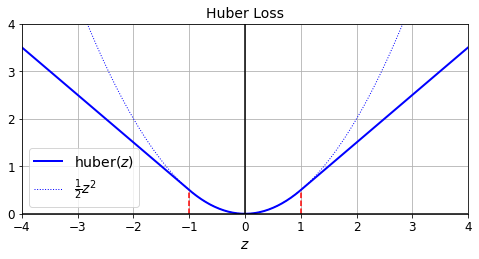

In [67]:
plt.figure(figsize=(8,3.5))
z = np.linspace(-4,4,200)
plt.plot(z,huber_fn(0,z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2/2,"b:",linewidth=1,label=r"$\frac{1}{2}z^2$")
plt.plot([-1,-1],[0,huber_fn(0.,-1.)], "r--")
plt.plot([1,1], [0,huber_fn(0.,1.)], "r--")
plt.gca().axhline(y=0, color="k")
plt.gca().axvline(x=0, color="k")
plt.axis([-4,4,0,4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber Loss", fontsize=14)
plt.show()

In [68]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [69]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [70]:
model.fit(X_train_scaled, y_train, epochs=2,
         validation_data=(X_valid_scaled,y_valid))

Epoch 1/2
363/363 [==============================] - 2s 4ms/step - loss: 0.6235 - mae: 0.9953 - val_loss: 0.2862 - val_mae: 0.5866
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2197 - mae: 0.5177 - val_loss: 0.2382 - val_mae: 0.5281


### Saving/Loading Models with Custom Objects

In [71]:
model.save("my_custom_loss_model.h5")

In [72]:
model = keras.models.load_model("my_custom_loss_model.h5",
                                custom_objects={"huber_fn": huber_fn})

In [74]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2054 - mean_absolute_error: 0.4982 - val_loss: 0.2209 - val_mean_absolute_error: 0.5050
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1999 - mean_absolute_error: 0.4900 - val_loss: 0.2127 - val_mean_absolute_error: 0.4986


In [75]:
#if I want to have an adjustable threshold for error
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

When the model is saved it wont save the threshold,
so that will have to be specified when model is loaded.

In [76]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [77]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2226 - mae: 0.4892 - val_loss: 0.2540 - val_mae: 0.4907
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2184 - mae: 0.4844 - val_loss: 0.2372 - val_mae: 0.4879


In [78]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [79]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [80]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2147 - mean_absolute_error: 0.4800 - val_loss: 0.2133 - val_mean_absolute_error: 0.4654
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2119 - mean_absolute_error: 0.4762 - val_loss: 0.1992 - val_mean_absolute_error: 0.4643


Since if the model needs the loss function threshold specifed, I can create a subclass of the `keras.losses.Loss` class and then implement its `get_config()` method.

- Constructor method accepts the `**kwargs` and passes them to parent constructor which handles the name of the loss and the reduction algorithm to use to aggregate the individual instance loss.
    - By default, that algorithm is 'sum_over_batch_size', which means the loss will be the sum of instance losses, weight by sample weights, and divided by batch size.
- `call()` method takes labels and predictions, computes and instnace losses and return them.
- `get_config()` method returns a ditctionary mapping each hyperparameter to its value. It first calls the parent class's `get_config()` then adds the new hyperparameters to this dictionary. the `{**x}` syntax unpacks the baseconfig so it goes into the returned dictionary

In [85]:
class HuberLoss(keras.losses.Loss):
    def __init__(self,threshold=1.0,**kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error,squared_loss,linear_loss)

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [87]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.7892 - mae: 0.9212 - val_loss: 0.5515 - val_mae: 0.6565
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2531 - mae: 0.5172 - val_loss: 0.4497 - val_mae: 0.6041


In [88]:
model.save("my_model_with_a_custom_loss_class.h5")

So when I save the model, the loss instance's `get_config()` is called by Keras and Keras saves the file as JSON in the HDF5 file. 

Loading the model, it calls the `from_config()` class method on HuberLoss: this class method is implemented by the base class **Loss**, which passes `**config` to the constructor. 

### Custom Activation Functions, Initializers, Regularizers, and Constraints

In [89]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [90]:
#equivalent to keras.activations.softplus() or
# tf.nn.softplus
def my_softplus(z): #return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)
#equivalent to keras.initializers.glorot_normal()
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev,dtype=dtype)
#equivalent to keras.regularizers.l1(0.01)
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))
#equivalent to keras.constraints.nonneg()
def my_positive_weights(weights):
    #return value is just tf.nn.relu(weights)
    return tf.where(weights <0., tf.zeros_like(weights), weights)    
    


In [91]:
layer = keras.layers.Dense(1, activation=my_softplus,
                          kernel_initializer=my_glorot_initializer,
                          kernel_regularizer=my_l1_regularizer,
                          kernel_constraint=my_positive_weights)


In [92]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

If any of these functions have hyperparameters that need to be saved along with the model, then I will need to subclass the appropriate class.
- keras.regularizers.Regularizer
- keras.constraints.Constraint
- keras.initializers.Initializer
- keras.layers.Layer

An example:

In [93]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}
    

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

model.compile(loss="mse", optimizer="nadam", metrics=["mae"])


model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

model.save("my_model_with_many_custom_parts.h5")

#note that I dont have to call the value of MyL1Regularizer here
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


## Custom Metrics

Losses and metrics are different. Loss is used to *train* a model and can be uninterpretable. Metrics are used to *evaluate* a model and understood.

Custom metrics are made in the same way as custom loss methods.

In [94]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [95]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [96]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [97]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 2.0982 - huber_fn: 0.9192
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.6052 - huber_fn: 0.2733


**Warning**: if you use the same function as the loss and a metric, you may be surprised to see different results. This is generally just due to floating point precision errors: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences. Moreover, when using sample weights, there's more than just precision errors:

- the loss since the start of the epoch is the mean of all batch losses seen so far. Each batch loss is the sum of the weighted instance losses divided by the batch size (not the sum of weights, so the batch loss is not the weighted mean of the losses).
- the metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

If you do the math, you will find that loss = metric * mean of sample weights (plus some floating point precision error).

In [98]:
model.compile(loss=create_huber(2.0), 
              optimizer="nadam", 
              metrics=[create_huber(2.0)])

In [99]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2,
                    sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1175 - huber_fn: 0.2399
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1131 - huber_fn: 0.2297


In [101]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.11749906837940216, 0.11906625573138947)

### Streaming Metrics

Also called a *stateful metric*. Most of the time the metric will be an average across an epoch, and this is generally okay. But in some cases, like precision score, the mean of the precision won't be the true precision score.

Example: 5 positive predictions and 4 true positive predictions in one batch, thats 80%. 3 positive predictions and 0 true positives in second batch, 0% correct. Taking the average that is 40%, but in truth, its 50% (4 + 0) / (5 + 3). 

So we need to keep track of the totals.

In [102]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [103]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [104]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [107]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [108]:
precision.reset_states()

In [109]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self,threshold=1.0, **kwargs):
        super().__init__(**kwargs) #handles base args(e.g. dtype)
        self.threshold = threshold
        # creating variables to track sum of all huber losses
        self.total = self.add_weight("total", initializer='zeros')
        # and number of instances seen so fat
        self.count = self.add_weight("count", initializer='zeros')
    def huber_fn(self,y_true,y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def update_state(self,y_true,y_pred,sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true),tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}
    

In [111]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [112]:
# Could have also implemented the metric like so
# handles shape better and supports sample weights

class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [113]:
'''
Warning: In TF 2.2, tf.keras adds an 
extra first metric in model.metrics at position 0 
(see TF issue #38150). This forces us to 
use model.metrics[-1] rather than model.metrics[0]
to access the HuberMetric.
'''

'\nWarning: In TF 2.2, tf.keras adds an \nextra first metric in model.metrics at position 0 \n(see TF issue #38150). This forces us to \nuse model.metrics[-1] rather than model.metrics[0]\nto access the HuberMetric.\n'

## Custom Layers

For when there is no default implementation of an architecure that I want, or a repetitive patterned architecure.

If I want to create a layer without any weights, `keras.layers.Lambda`. Example:

In [114]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [115]:
exponential_layer([-1.,0.,1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

Can be used with any of the API's (Sequential,...)

Adding an exponential layer at the output of a regression model can be useful if the values to predict are positive and with very different scales (e.g., 0.001, 10., 10000):

In [119]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: nan


nan

Implementing a layer with weights or a *stateful* layer:

In [120]:
class MyDense(keras.layers.Layer):
    #takes all hyperparameters as args
    def __init__(self, units, activation=None, **kwargs):
        #calls the parent constructor, passing it the kwargs
        #taking care of the standard args like input_shape and name
        super().__init__(**kwargs)
        self.units = units
        #so that it will accept activation funcstions or 
        #just regular strings like relu or selu
        self.activation = keras.activations.get(activation)
# build functions role is to create layer variables by 
# calling the add_weight for each weight.
# its called the first time the new layers is used
    def build(self, batch_input_shape):
        #kernel is the connection weights matrix
        #reason batch_input_shape[-1] is b/c we need to know the size of the 
        #last dimension of inputs
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        #must call this at the end, calls parent constructor
        #to set self.built=True and the layer is done
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        #will compute the output of the layer
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        #for this e.g., same shape as inputs, just replacing last dimension
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        #so that we can save the configs
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}
        #Saving the activation functios full config as keras.activations.serialize

Can generally omit the compute_output_shape(), tf.keras will infer the output shape, except when layer is dynamic. For other Keras implementations, it is required or it assumes that the output shape is th same as input shape.

In [121]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [122]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [123]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

model.save("my_model_with_a_custom_layer.h5")

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 2.2563 - val_loss: 0.9472
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: 0.5474


In [124]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

To create a layer with multiple inputs, the `call()` method needs to be a tuple containing the inputs, the `compute_output_shape()` should also be a tuple with each input's batch shape.

For a layer with multiple outputs, `call()` returns the list of outputs, and `compute_output_shape()` returns the list of batch output shapes (one per output).

E.g. Takes two inputs and return 3 outputs:

In [126]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1,X2 = X
        return [X1 + X2, X1 * X2, X1 / X2]
    
    def compute_output_shape(self, batch_input_shape):
        b1, b2 = batch_input_shape
        return [b1,b1,b1]

This layer can't be used by the Sequential API, since that is only one input and one output.

If the layer needs to have different behaviour during training vs testing, then will have to add a `training` argument to the `call()` method. 

For e.g.:

In [127]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self,stddev,**kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev
    
    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

## Custom models

Example below doesn't make sense, just for example purposes. Shows you can do loops and skip connections.

In [128]:
X_new_scaled = X_test_scaled

In [129]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons,
                                         activation="elu",
                                         kernel_initializer="he_normal") 
                       for _ in range(n_layers)]
        
    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [130]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                         kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2,30)
        self.block2 = ResidualBlock(2,30)
        self.out = keras.layers.Dense(output_dim)
    
    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        z = self.block2(Z)
        return self.out(z)

Create the layers in the constructor and use them in the call() method. To save the model need the get_config() method in both custom layer and model to use load_model() or save_weights() and load_weights().

The `Model` class is actually a subclass of the `Layer` class but Model has a few more functions and its better to be able to distinguish between the parts for readability. 

## Losses and Metrics based on Model Internals

The previous custom losses and metrics were all based on the labels and the predictions. Sometimes, we want to define losses based on other parts of the model, such as weights or activations of hidden layers. Useful for regularization purposes or to monitor internal aspects of the model.

Defining a custom loss based on model internals, compute it based on what yo want to measure, then pass result to add_loss() method. 

E.g. below: Custom regression MLP model, stack of 5 hidden layers plus output. Also, auxiiliary output on top of the upper hidden layer. The loss associated with this aux output will be call the *reconstruction loss* (the mean squared difference between reconstruction and the inputs). Adding this reconstruction loss to the main loss we encourage the model to keep more information, even not useful information, which helps with generalization. 





In [135]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        # TODO: check https://github.com/tensorflow/tensorflow/issues/26260
        #self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        #if training:
        #    result = self.reconstruction_mean(recon_loss)
        #    self.add_metric(result)
        return self.out(Z)

- Constructor creates the DNN with 5 dense layers and 1 output layer

- `build()` creates an extra dense layer which will be used to reconstruct the inputs of the model. Has to be created here bc # of units must equal # of inputs, and number is unknown before build() is called.
 
- call() processes inputs through all 5 hiddfen layers, then passes them through the reconstruction layer, which produces the reconstruction.

- call() computes the reconstruction loss and addes it to the model's list of losses using `add_loss()`. The recon_loss is scaled down so as not to overpower the main loss. 

- call() method passes the output of hidden layers to output layer. 


In [136]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [137]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Epoch 1/2


InaccessibleTensorError: in user code:

    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/keras/engine/compile_utils.py:230 __call__
        reg_loss = math_ops.add_n(regularization_losses)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3512 add_n
        return gen_math_ops.add_n(inputs, name=name)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py:432 add_n
        "AddN", inputs=inputs, name=name)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:744 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/func_graph.py:589 _create_op_internal
        inp = self.capture(inp)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/func_graph.py:639 capture
        % (tensor, tensor.graph, self))

    InaccessibleTensorError: The tensor 'Tensor("mul:0", shape=(), dtype=float32)' cannot be accessed here: it is defined in another function or code block. Use return values, explicit Python locals or TensorFlow collections to access it. Defined in: FuncGraph(name=build_graph, id=5554482312); accessed from: FuncGraph(name=train_function, id=5554432208).
    
